<a href="https://colab.research.google.com/github/sijixx/Machine-Learning/blob/main/houseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

from google.colab import files
uploaded = files.upload()

Saving house data.csv to house data.csv


In [6]:
df =pd.read_csv('house data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
df=df[['price', 'bedrooms', 'condition', 'yr_built', 'zipcode']]
df.head()

,price,bedrooms,condition,yr_built,zipcode
0,221900.0,3,3,1955,98178
1,538000.0,3,3,1951,98125
2,180000.0,2,3,1933,98028
3,604000.0,4,5,1965,98136
4,510000.0,3,3,1987,98074


In [11]:
df.corr()

,price,bedrooms,condition,yr_built,zipcode
price,1.000000,0.308350,0.036362,0.054012,-0.053203
bedrooms,0.308350,1.000000,0.028472,0.154178,-0.152668
condition,0.036362,0.028472,1.000000,-0.361417,0.003026
yr_built,0.054012,0.154178,-0.361417,1.000000,-0.346869
zipcode,-0.053203,-0.152668,0.003026,-0.346869,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21613 non-null  float64
 1   bedrooms   21613 non-null  int64  
 2   condition  21613 non-null  int64  
 3   yr_built   21613 non-null  int64  
 4   zipcode    21613 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 844.4 KB


In [14]:
df.isnull().sum()

price        0
bedrooms     0
condition    0
yr_built     0
zipcode      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


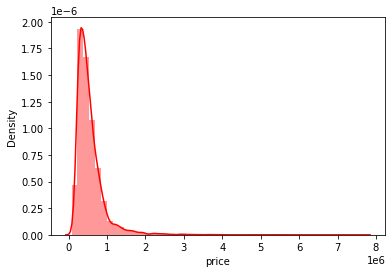

In [19]:
sn.distplot(df['price'], color='r')

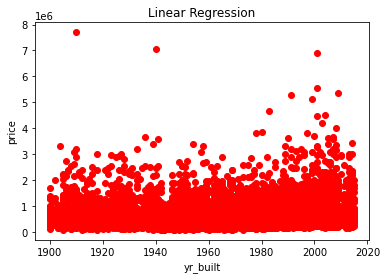

In [20]:
plt.scatter(df["yr_built"], df["price"], color='r')
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("yr_built")
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

X= df[["yr_built", "bedrooms"]]
y= df["price"]
      
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.35,random_state=40)

lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)
predicted= lin_reg.predict(X_test)

print("MSE", mean_squared_error(y_test, predicted))
print("R squared", metrics.r2_score(y_test, predicted))

MSE 113639694726.18771
R squared 0.0960712149891152


In [22]:
lin_reg.score(X_test,y_test)

0.0960712149891152

In [23]:
lin_reg.coef_

array([-9.75986696e+00,  1.26646039e+05])

In [24]:
lin_reg.intercept_

132725.43334618618